# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
# import libraries here
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

%matplotlib inline

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [4]:
# your code here
temp = pd.read_csv('temp_states.csv')

#### Print `temp`.

In [5]:
# your code here
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [6]:
# your code here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [ ]:
"""
City and Stae are string types, so they are categorical varibles.
Temperature is float, so it is numeric.
"""

#### Select the rows where state is New York.

In [7]:
# your code here
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [10]:
# your code here
temp.groupby(by = 'City').mean().reset_index() #didn't really need to do this, Cities are unique

,City,Temperature
0,Albany,9.444444
1,Bridgeport,14.444444
2,Buffalo,3.333333
3,Hartford,17.222222
4,NYC,19.444444
5,Newark,20.000000
6,Treton,22.222222


#### Which states and cities have a temperature above 15 degrees Celsius?

In [16]:
# your code here

print('cities and states:')
temp[temp['Temperature'] >15]

cities and states:


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [17]:
# your code here
print('cities:')
temp[temp['Temperature'] >15]['City']

cities:


0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [20]:
# your code here

cond = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)

temp[cond]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [22]:
# your code here

temp.groupby(by = 'State').agg(['mean', 'std']).reset_index()

State Temperature          
                      mean       std
0  Connecticut   15.833333  1.964186
1   New Jersey   21.111111  1.571348
2     New York   10.740741  8.133404

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [26]:
# your code here

employees = pd.read_csv('Employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the `employees` dataframe. Comment your results.

In [28]:
# your code here
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [ ]:
"""
Name, Department, Education, Gender, Title are categorical.
Years and Salary are numeric
"""

#### What's the average salary in this company?

In [41]:
# your code here
m = employees[['Salary']].mean()[0]
print(f"average salary:\n{m}")

average salary:
48.888888888888886


#### What's the highest salary?

In [42]:
# your code here

m = employees[['Salary']].max()[0]
print(f"max salary:\n{m}")

max salary:
70


#### What's the lowest salary?

In [43]:
# your code here

m = employees[['Salary']].min()[0]
print(f"min salary:\n{m}")

min salary:
30


#### Who are the employees with the lowest salary?

In [44]:
# your code here

employees[employees['Salary'] == employees[['Salary']].min()[0]]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find all the information about an employee called David.

In [46]:
# your code here

employees[employees['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [51]:
# your code here
employees.loc[employees['Name'] == 'David', 'Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [52]:
# your code here

employees.loc[employees['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [65]:
# Method 1
# your code here
employees.loc[:2,:]
employees.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [67]:
# Method 2
# your code here

employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [68]:
# your code here

employees.loc[(employees['Title'] == 'associate') & (employees['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [69]:
# your code here
employees.groupby(by = 'Years').mean().reset_index()

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average salary per title?

In [70]:
# your code here
employees.groupby(by = 'Title').mean().reset_index()

,Title,Years,Salary
0,VP,8.00,70.000000
1,analyst,2.25,32.500000
2,associate,4.00,56.666667


####  Find the salary quartiles.


In [75]:
# your code here

print('quartiles:')
employees['Salary'].describe()[4:7]

quartiles:


25%    35.0
50%    55.0
75%    60.0
Name: Salary, dtype: float64

#### Is the mean salary different per gender?

In [77]:
# your code here
print('Yes, males have higher salary')
employees.groupby(by = 'Gender').mean().reset_index()

Yes, males have higher salary


,Gender,Years,Salary
0,F,4.0,47.5
1,M,4.2,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [99]:
# your code here
employees.groupby(by = 'Department').agg(['min', 'mean', 'max', 'count']).reset_index()

Department Years                     Salary                 
               min      mean max count    min   mean max count
0         HR     2  4.666667   8     3     30  45.00  70     3
1         IT     1  4.500000   8     4     30  48.75  70     4
2      Sales     2  2.500000   3     2     55  55.00  55     2

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [98]:
# your code here
employees.groupby('Department')['Salary'].apply(lambda x: x.max() - x.min())

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [100]:
# your code here

orders = pd.read_csv('Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [101]:
# your code here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [ ]:
"""
We have categorical (string) fields:

StockCode        object
Country          object

And numerical variables:
InvoiceNo         int64
year              int64
month             int64
day               int64
hour              int64
Quantity          int64
UnitPrice       float64
amount_spent    float64

Categorical field saved as int type:
CustomerID        int64

Date field saved as string type:
InvoiceDate      object

Text:
Description      object
"""

####  What is the average purchase price?

In [102]:
# your code here

orders['UnitPrice'].mean()

3.116174480549152

#### What are the highest and lowest purchase prices? 

In [107]:
# your code here

print(f"max {orders['UnitPrice'].max()},\nmin {orders['UnitPrice'].min()}")

max 8142.75,
min 0.0


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [108]:
# your code here
orders[orders['Country'] == 'Spain']['CustomerID'].unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?

In [118]:
# your code here
orders[orders['Country'] == 'Spain']['CustomerID'].nunique()
#len(orders[orders['Country'] == 'Spain']['CustomerID'].unique())

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [122]:
# your code here
gr = orders.groupby('CustomerID').agg({'Quantity':'sum'})
gr[gr['Quantity'] > 50]

,Quantity
CustomerID,
12346,74215
12347,2458
12348,2341
12349,631
12350,197
...,...
18278,66
18281,54
18282,103


#### Select orders from Spain that include more than 50 items.

In [138]:
# your code here
"""
I am assumming the OrderID is InvoiceNo
"""
gr = orders.groupby(['InvoiceNo','Country']).agg({'Quantity':'sum'}).reset_index()
gr[(gr['Quantity'] > 50) & (gr['Country'] == 'Spain')]

,InvoiceNo,Country,Quantity
275,536944,Spain,400
748,538095,Spain,67
894,538525,Spain,300
1231,539351,Spain,100
1562,540469,Spain,630
...,...,...,...
17174,578321,Spain,920
17185,578339,Spain,77
17645,579503,Spain,117
18245,580955,Spain,182


#### Select all free orders.

In [139]:
# your code here

gr = orders.groupby(['InvoiceNo']).agg({'amount_spent':'sum'}).reset_index()
gr[(gr['amount_spent'] == 0)]

,InvoiceNo,amount_spent
2721,543599,0.0
11301,564651,0.0
12848,568384,0.0
17360,578841,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [141]:
# your code here

"""
Solving for OrderItems
"""

orders[orders['Description'].str.startswith('lunch bag')]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [142]:
# your code here

orders[(orders['Description'].str.startswith('lunch bag')) & (orders['year'] == 2011)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

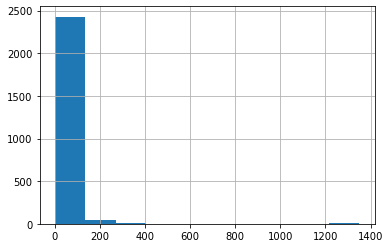

In [145]:
# your code here

orders[orders['Country'] == 'Spain']['amount_spent'].hist()

#### Select all orders made in the month of August.

In [170]:
# your code here
orders[(orders['month'] == 8)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [185]:
# your code here
# assuming InvoiceNo is order identifier
orders[(orders['month'] == 8)].groupby(by = ['Country'])['InvoiceNo'].nunique()

Country
Australia             2
Austria               2
Belgium               9
Canada                1
Channel Islands       5
Denmark               1
EIRE                 17
Finland               3
France               28
Germany              39
Iceland               1
Israel                1
Italy                 4
Malta                 2
Netherlands           8
Norway                2
Poland                2
Portugal              1
Spain                10
Sweden                5
Switzerland           3
United Kingdom     1133
Unspecified           2
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country?

In [191]:
# your code here

# I will calculate average total amount spent per invoice per country

df = orders.groupby(by = ['Country', 'InvoiceNo'])['amount_spent'].sum().reset_index()
df.groupby(by = ['Country'])['amount_spent'].mean()

Country
Australia               2430.198421
Austria                  599.922353
Bahrain                  274.200000
Belgium                  420.370816
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          786.555385
Cyprus                   849.398750
Czech Republic           413.370000
Denmark                 1053.074444
EIRE                    1021.330385
European Community       325.062500
Finland                  549.904390
France                   537.336889
Germany                  500.803370
Greece                   952.104000
Iceland                  615.714286
Israel                  1444.338000
Italy                    460.085263
Japan                   1969.282632
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    545.118000
Netherlands             3004.698316
Norway                  1004.595556
Poland                   386.034211
Portugal                 586.664737
RSA                 

In [201]:
#We can also calculate the average amount_spent per country, without calculating total spend per InvoiceNo
orders.groupby(by = ['Country'])['amount_spent'].mean().reset_index()

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [196]:
# your code here

orders[orders['UnitPrice'] == orders['UnitPrice'].max()][['StockCode','Description']]

,StockCode,Description
118352,POST,postage


#### What is the average amount spent per year?

In [199]:
# your code here

# I will calculate amount spent per year based on amount_spent column

orders.groupby(by = ['year'])['amount_spent'].mean().reset_index()

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
